## Построение графиков и сравнительный анализ результатов

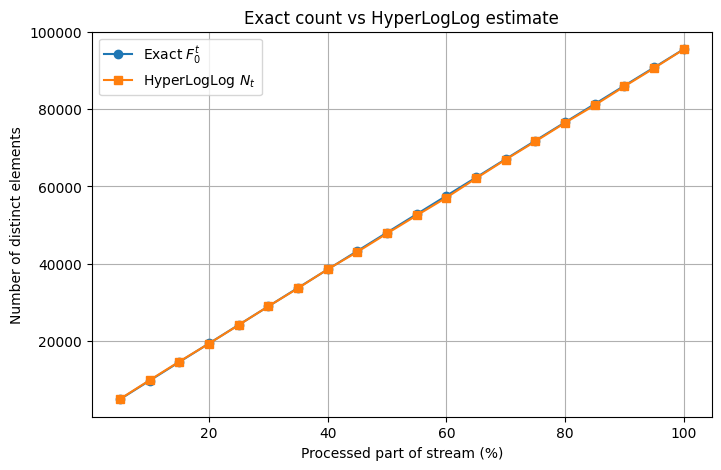

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("results.csv")

plt.figure(figsize=(8, 5))

plt.plot(df["percent"], df["exact"],
         marker="o", label="Exact $F_0^t$")

plt.plot(df["percent"], df["mean"],
         marker="s", label="HyperLogLog $N_t$")

plt.xlabel("Processed part of stream (%)")
plt.ylabel("Number of distinct elements")
plt.title("Exact count vs HyperLogLog estimate")
plt.legend()
plt.grid()

plt.show()

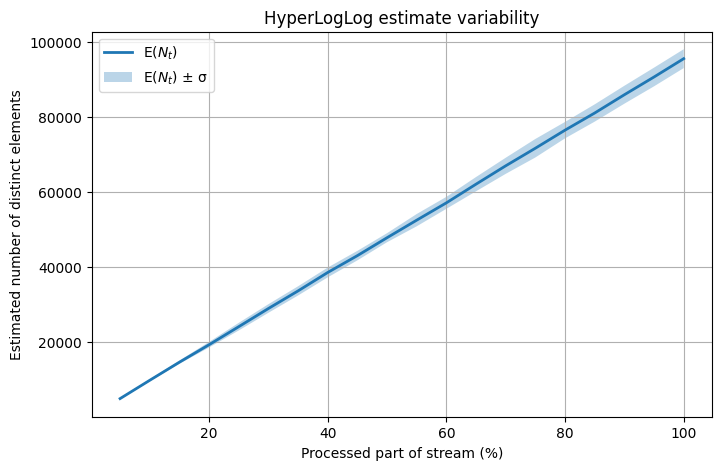

In [15]:
plt.figure(figsize=(8, 5))

plt.plot(df["percent"], df["mean"],
         label="E($N_t$)", linewidth=2)

plt.fill_between(
    df["percent"],
    df["mean"] - df["std"],
    df["mean"] + df["std"],
    alpha=0.3,
    label="E($N_t$) ± σ"
)

plt.xlabel("Processed part of stream (%)")
plt.ylabel("Estimated number of distinct elements")
plt.title("HyperLogLog estimate variability")
plt.legend()
plt.grid()

plt.show()

In [17]:
B = 10
m = 2**B
rse_lower = 1.04 / np.sqrt(m)
rse_upper = 1.32 / np.sqrt(m)

print(f"m = {m}, теоретическая относительная ошибка: {rse_lower*100:.2f}% – {rse_upper*100:.2f}%")

df['rel_error'] = (df['mean'] - df['exact']) / df['exact']
df['rel_std'] = df['std'] / df['exact']

print("\nОтносительная ошибка и дисперсия по шагам (%):")
print(df[['percent','rel_error','rel_std']] * 100)

max_error = df['rel_error'].abs().max()
print(f"\nМаксимальная относительная ошибка HLL: {max_error*100:.2f}%")
if max_error <= rse_upper:
    print("Все значения попадают в теоретические пределы")
else:
    print("Ошибка превышает теоретическую границу")

m = 1024, теоретическая относительная ошибка: 3.25% – 4.12%

Относительная ошибка и дисперсия по шагам (%):
    percent  rel_error   rel_std
0       500   1.477941  3.360662
1      1000   1.170571  2.692355
2      1500   0.737052  2.979091
3      2000  -0.166382  3.824544
4      2500  -0.127489  4.200298
5      3000   0.056647  3.955995
6      3500  -0.278206  3.636525
7      4000   0.130329  3.382600
8      4500  -0.542158  2.922245
9      5000  -0.494726  2.500239
10     5500  -0.621605  3.098711
11     6000  -0.796019  2.765137
12     6500  -0.364570  3.045122
13     7000  -0.174079  3.196644
14     7500  -0.279413  3.432881
15     8000  -0.169826  2.856138
16     8500  -0.368312  2.828580
17     9000  -0.203050  2.774275
18     9500  -0.188197  2.740070
19    10000  -0.023759  2.629887

Максимальная относительная ошибка HLL: 1.48%
Все значения попадают в теоретические пределы
